# Operazioni

Notebook di contronfo del proramma operazioni.c eseguite sia sul mio pc e su board RISC-V.
Il programma esegue operazioni aritmetiche e memorizza i tempi di esecuzione.

Vengono generate due matrici quadrate su cui vengono eseguite elemento per elemento le operazioni. Le matrici generate hanno dimensione 1000 x 1000, 2500 x 2500, 5000 x 5000, 8000 x 8000, 10000 x 10000, 15000 x 15000. Per ogni matrice vengono eseguite 5 prove su viene calcolato il tempo di esecuzione come media aritmetica.



In [5]:
#Utilità
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [6]:
import pandas as pd

# data frame
opPC = pd.read_csv('Dati.csv', sep=';', decimal='.',
                   skiprows=1, skipfooter = 8, engine = 'python')
opPC.set_index('Operazione', inplace=True)


opRISC = pd.read_csv('Dati.csv', sep=';', decimal='.',
                   skiprows = 12, skipfooter=0, engine='python')
opRISC.set_index('Operazione', inplace=True)


display_side_by_side(opPC, opRISC, titles=['PC', 'RISC'])



,1000,2500,5000,8000,10000,15000
Operazione,,,,,,
Somma,0.002317,0.013848,0.055129,0.142010,0.227784,0.504650
Sottrazione,0.002324,0.013921,0.054900,0.142941,0.227505,0.504767
Prodotto,0.002344,0.014010,0.055036,0.143293,0.226141,0.504829
Divisione,0.002352,0.013953,0.055298,0.142226,0.227948,0.505007
Modulo,0.002298,0.013880,0.055009,0.142129,0.227835,0.505035
,1000,2500,5000,8000,10000,15000
Operazione,,,,,,
Somma,0.011256,0.069917,0.279804,0.714786,1.117411,2.512942
Sottrazione,0.011237,0.069850,0.279895,0.714680,1.117352,2.512978


Le tabelle rappresentano i tempi di esecuzione delle operazioni.

### Osservazioni
In entrambi i casi i tempi di esecuzione di ogni gruppo è molto simile, calcolando la deviazione standard si ottengono valori per gruppo dell ordine compreso tra 10 ^ -3 e 10 ^ -4.
Di seguito una tabella illustrativa delle deviazioni standard dei gruppi per il Pc e la board.

In [127]:
dati = {'index': [1000,2500,5000,8000,10000,15000], 'PC' : opPC.std().to_numpy(), 'RISC' : opRISC.std().to_numpy()}
pd.DataFrame(data = dati).set_index('index')

,PC,RISC
index,,
1000,0.000038,0.000033
2500,0.000020,0.000053
5000,0.000303,0.000296
8000,0.000566,0.000366
10000,0.003558,0.000266
15000,0.001288,0.000616


## Grafici

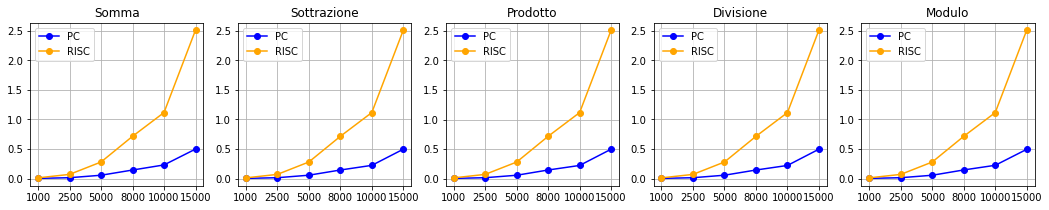

In [142]:
import matplotlib.pyplot as plt

valori = opPC.columns.to_numpy()
#PC
sommaP = opPC.loc['Somma'].to_numpy()
sottrazioneP = opPC.loc['Sottrazione'].to_numpy()
prodottoP = opPC.loc['Prodotto'].to_numpy()
divisioneP = opPC.loc['Divisione'].to_numpy()
moduloP = opPC.loc['Modulo'].to_numpy()

#RISC
sommaR = opRISC.loc['Somma'].to_numpy()
sottrazioneR = opRISC.loc['Sottrazione'].to_numpy()
prodottoR = opRISC.loc['Prodotto'].to_numpy()
divisioneR = opRISC.loc['Divisione'].to_numpy()
moduloR = opRISC.loc['Modulo'].to_numpy()

plt.figure(figsize=(18, 3))

plt.subplot(151)
plt.plot(valori, sommaP, marker = 'o', color = 'Blue', label = 'PC')
plt.plot(valori, sommaR, marker='o', color = 'Orange', label = 'RISC')
plt.legend()
plt.grid(True)
plt.title('Somma')



plt.subplot(152)
plt.plot(valori, sottrazioneP, marker='o', color='Blue', label = 'PC')
plt.plot(valori, sottrazioneR, marker='o', color='Orange', label = 'RISC')
plt.legend()
plt.grid(True)
plt.title('Sottrazione')

plt.subplot(153)
plt.plot(valori, prodottoP, marker='o', color='Blue', label = 'PC')
plt.plot(valori, prodottoR, marker='o', color='Orange', label = 'RISC')
plt.legend()
plt.grid(True)
plt.title('Prodotto')

plt.subplot(154)
plt.plot(valori, divisioneP, marker = 'o', color = 'Blue', label = 'PC')
plt.plot(valori, divisioneR, marker='o', color='Orange', label = 'RISC')
plt.legend()
plt.grid(True)
plt.title('Divisione')

plt.subplot(155)
plt.plot(valori, moduloP, marker='o', color='Blue', label = 'PC')
plt.plot(valori, moduloR, marker='o', color='Orange', label = 'RISC')
plt.legend()
plt.grid(True)
plt.title('Modulo')


plt.show()

